In [52]:
import matplotlib.pyplot as plt
import numpy as np
import cv2
import os
import PIL
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential



In [53]:
'''Downloading dataset of flowers and saving it dataset folder'''
dataset_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"
data_dir= tf.keras.utils.get_file('flower_photos', origin=dataset_url, cache_dir='.', untar=True)

In [54]:
data_dir

'.\\datasets\\flower_photos'

In [55]:
# The above path is also correct but now we are taking as windows path object
import pathlib

data_dir = pathlib.Path(data_dir)
data_dir

WindowsPath('datasets/flower_photos')

In [56]:
# All those images that image format is in JPG
# Length of all jpg images

image_count = len(list(data_dir.glob('*/*.jpg')))
image_count

3670

In [57]:
# For selecting particular images

roses = list(data_dir.glob('roses/*'))
roses[:5]

[WindowsPath('datasets/flower_photos/roses/10090824183_d02c613f10_m.jpg'),
 WindowsPath('datasets/flower_photos/roses/102501987_3cdb8e5394_n.jpg'),
 WindowsPath('datasets/flower_photos/roses/10503217854_e66a804309.jpg'),
 WindowsPath('datasets/flower_photos/roses/10894627425_ec76bbc757_n.jpg'),
 WindowsPath('datasets/flower_photos/roses/110472418_87b6a3aa98_m.jpg')]

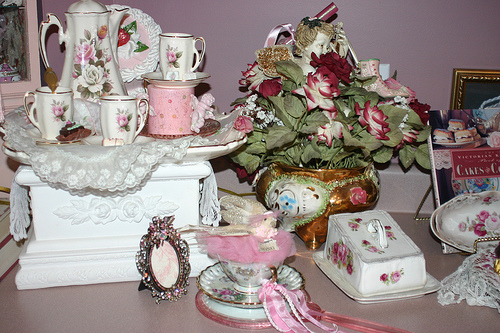

In [58]:
# See the images using PIL library, for image
PIL.Image.open(str(roses[300]))

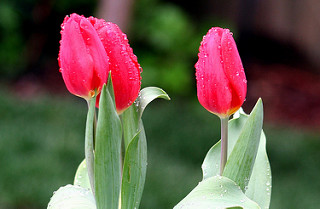

In [59]:
tulips = list(data_dir.glob('tulips/*'))
PIL.Image.open(str(tulips[0]))

In [60]:
# Making a dictionary for class labels to train model
flowers_images_dict = {
    'roses':list(data_dir.glob('roses/*')),
    'daisy':list(data_dir.glob('daisy/*')),
    'dandelion':list(data_dir.glob('dandelion/*')),
    'sunflowers':list(data_dir.glob('sunflowers/*')),
    'tulips':list(data_dir.glob('tulips/*')),
}

In [61]:
# Checking each class with images count
flowers_images_dict['roses']

[WindowsPath('datasets/flower_photos/roses/10090824183_d02c613f10_m.jpg'),
 WindowsPath('datasets/flower_photos/roses/102501987_3cdb8e5394_n.jpg'),
 WindowsPath('datasets/flower_photos/roses/10503217854_e66a804309.jpg'),
 WindowsPath('datasets/flower_photos/roses/10894627425_ec76bbc757_n.jpg'),
 WindowsPath('datasets/flower_photos/roses/110472418_87b6a3aa98_m.jpg'),
 WindowsPath('datasets/flower_photos/roses/11102341464_508d558dfc_n.jpg'),
 WindowsPath('datasets/flower_photos/roses/11233672494_d8bf0a3dbf_n.jpg'),
 WindowsPath('datasets/flower_photos/roses/11694025703_9a906fedc1_n.jpg'),
 WindowsPath('datasets/flower_photos/roses/118974357_0faa23cce9_n.jpg'),
 WindowsPath('datasets/flower_photos/roses/11944957684_2cc806276e.jpg'),
 WindowsPath('datasets/flower_photos/roses/12045735155_42547ce4e9_n.jpg'),
 WindowsPath('datasets/flower_photos/roses/12165480946_c4a3fe182d_n.jpg'),
 WindowsPath('datasets/flower_photos/roses/12202373204_34fb07205b.jpg'),
 WindowsPath('datasets/flower_photos/

In [62]:
# Assigning labels to numbers
flowers_labels_dict ={
    'roses':0,
    'daisy':1,
    'dandelion':2,
    'sunflowers':3,
    'tulips':4,
}

In [63]:
# Getting the actual path of an image

str(flowers_images_dict['roses'][0])

'datasets\\flower_photos\\roses\\10090824183_d02c613f10_m.jpg'

In [64]:
img = cv2.imread(str(flowers_images_dict['roses'][0]))
img.shape

(240, 179, 3)

In [65]:
img_resize = cv2.resize(img,(100,100)).shape

In [66]:
img_resize

(100, 100, 3)

In [90]:
# Preparing X train Y train and adding all the data in both X and Y labels

X , y = [] , []

for flower_name, images in flowers_images_dict.items():
    #print(flower_name)
    #print(len(images))
    for image in images:
        img = cv2.imread(str(image))
        resized_img = cv2.resize(img,(100,100))
        X.append(resized_img)
        y.append(flowers_labels_dict[flower_name])
        

In [91]:
X = np.array(X)
y = np.array(y)

In [92]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)


In [93]:
# Now scaling the dataset between the range of 0 and 1

X_train_scaled = X_train / 255
X_test_scaled = X_test / 255

In [100]:
num_classes = 5

model = Sequential([
    # These are Hyper-parameters of CNN
    layers.Conv2D(16, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(32, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(64, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(128, 5, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Flatten(),
    layers.Dense(256, activation='relu'),
    layers.Dense(num_classes)
    
])

model.compile(optimizer='adam',
             loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
             metrics=['accuracy'])

model.fit(X_train_scaled, y_train, epochs=30)

Epoch 1/30
86/86 [==============================] - 16s 166ms/step - loss: 1.2622 - accuracy: 0.4648
Epoch 2/30
86/86 [==============================] - 14s 168ms/step - loss: 1.0231 - accuracy: 0.5789
Epoch 3/30
86/86 [==============================] - 14s 166ms/step - loss: 0.9102 - accuracy: 0.6381
Epoch 4/30
86/86 [==============================] - 14s 167ms/step - loss: 0.8214 - accuracy: 0.6762
Epoch 5/30
86/86 [==============================] - 15s 169ms/step - loss: 0.7459 - accuracy: 0.7078
Epoch 6/30
86/86 [==============================] - 15s 170ms/step - loss: 0.6372 - accuracy: 0.7449
Epoch 7/30
86/86 [==============================] - 14s 166ms/step - loss: 0.5421 - accuracy: 0.7922
Epoch 8/30
86/86 [==============================] - 16s 182ms/step - loss: 0.4765 - accuracy: 0.8016
Epoch 9/30
86/86 [==============================] - 18s 207ms/step - loss: 0.3707 - accuracy: 0.8616
Epoch 10/30
86/86 [==============================] - 21s 247ms/step - loss: 0.3138 - accura

In [101]:
# Checking the model performance

model.evaluate(X_test_scaled,y_test)

29/29 [==============================] - 1s 30ms/step - loss: 1.8584 - accuracy: 0.7190


[1.8584108352661133, 0.7189542651176453]

In [102]:
# The values are not in 0 to 1 prediction because in the model we did not specify the classifier

predictions = model.predict(X_test_scaled)
predictions

29/29 [==============================] - 1s 30ms/step


array([[ -8.299458 ,  37.687946 ,  -5.340058 ,  -6.32658  , -15.835557 ],
       [  6.547536 ,   2.398596 ,  -9.492358 ,  -1.6809568,   1.1152544],
       [ -3.790175 ,  -5.428235 ,  24.585634 , -13.262661 , -14.014606 ],
       ...,
       [  3.3892775, -12.77348  ,  -5.591961 ,  12.243603 ,   5.220252 ],
       [  8.042537 , -10.0612335,   5.4822273, -11.003051 ,  -1.9598042],
       [  0.5704211, -13.911411 ,   1.7601362,   4.803494 ,   3.3024964]],
      dtype=float32)

In [103]:
# Now we are using softmax function to convert numpy array into a set of probabilites 

score = tf.nn.softmax(predictions[0])
score

<tf.Tensor: shape=(5,), dtype=float32, numpy=
array([1.0664101e-20, 1.0000000e+00, 2.0567213e-19, 7.6689175e-20,
       5.6890306e-24], dtype=float32)>

In [105]:
# np.argmax will give the index of the maximum element

#np.argmax(np.array([0,78,123,8]))

# Predicting the class label
np.argmax(score)



1

In [106]:
y_test[0]

1

In [131]:
data_augmentation = keras.Sequential([
    #layers.experimental.preprocessing.RandomFlip("horizontal", 
                                                 #input_shape=(img_height, 
                                                              #img_width,
                                                              #3)),
    layers.experimental.preprocessing.RandomZoom(0.3),
    layers.experimental.preprocessing.RandomContrast(0.9),
    layers.experimental.preprocessing.RandomRotation(0.2),
    
])

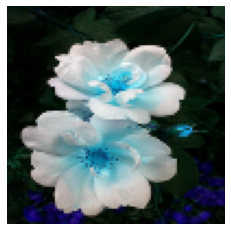

In [132]:
plt.axis('off')
plt.imshow(X[0])

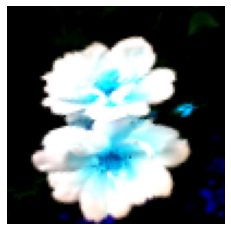

In [133]:
plt.axis('off')
plt.imshow(data_augmentation(X)[0].numpy().astype("uint8"))

In [135]:
num_classes = 5

model = Sequential([
  data_augmentation,
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(128, 5, padding='same', activation='relu'),
  layers.MaxPooling2D(),  
  layers.Dropout(0.2),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
              
model.fit(X_train_scaled, y_train, epochs=30)

Epoch 1/30


86/86 [==============================] - 27s 239ms/step - loss: 1.3728 - accuracy: 0.3815
Epoch 2/30
86/86 [==============================] - 20s 233ms/step - loss: 1.2018 - accuracy: 0.4887
Epoch 3/30
86/86 [==============================] - 20s 231ms/step - loss: 1.1193 - accuracy: 0.5371
Epoch 4/30
86/86 [==============================] - 21s 240ms/step - loss: 1.0983 - accuracy: 0.5491
Epoch 5/30
86/86 [==============================] - 19s 219ms/step - loss: 1.0562 - accuracy: 0.5745
Epoch 6/30
86/86 [==============================] - 16s 187ms/step - loss: 1.0152 - accuracy: 0.5963
Epoch 7/30
86/86 [==============================] - 16s 190ms/step - loss: 0.9896 - accuracy: 0.6072
Epoch 8/30
86/86 [==============================] - 17s 200ms/step - loss: 0.9869 - accuracy: 0.6068
Epoch 9/30
86/86 [==============================] - 17s 196ms/step - loss: 0.9326 - accuracy: 0.6381
Epoch 10/30
86/86 [==============================] - 17s 195ms/step - loss: 0.9199 - accuracy: 0.6352
